<a href="https://colab.research.google.com/github/Akanksha-c/Loaded_Word_recognition_using_NLP/blob/master/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install SpeechRecognition
import speech_recognition as sr
r = sr.Recognizer()

     |████████████████████████████████| 32.8 MB 33 kB/s 


In [ ]:
pip install pyaudioclassification

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from __future__ import absolute_import
import os
from pyaudioclassification.feat_extract import parse_audio_files, parse_audio_file
import numpy as np
import pyaudioclassification.models
from tensorflow.keras.utils import to_categorical
import numpy as np
from keras.optimizers import SGD

In [ ]:
def feature_extraction(data_path):
    """Parses audio files in supplied data path."""
    r = os.listdir(data_path)
    r.sort()
    features, labels = parse_audio_files(data_path, r)
    return features, labels

In [ ]:
from pyaudioclassification import feature_extraction, train, predict
features, labels = feature_extraction('/content/drive/MyDrive/NLP1')

  0%|          | 0/70 [00:00<?, ?it/s]

Reading /content/drive/MyDrive/NLP1/loaded/*.wav ...


 11%|█▏        | 8/70 [00:17<02:19,  2.25s/it]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=1020
  n_fft, y.shape[-1]
  0%|          | 0/100 [00:00<?, ?it/s]

Reading /content/drive/MyDrive/NLP1/non-loaded/*.wav ...


100%|██████████| 100/100 [02:19<00:00,  1.39s/it]


In [ ]:
import numpy as np
np.save('%s.npy' % '/content/drive/MyDrive/NLP1/loaded/01.wav' , features)
features = np.load('%s.npy' % '/content/drive/MyDrive/NLP1/loaded/01.wav')

In [ ]:
from pyaudioclassification import models,feature_extraction, train, predict

In [ ]:
import numpy as np
from keras.optimizers import SGD
import matplotlib.pyplot as plt

def train(features, labels, type='cnn', num_classes=None, print_summary=False,
    save_model=False, lr=0.01, loss_type=None, epochs=50, optimizer='SGD', verbose=True):
    
    labels = labels.ravel()
    if num_classes == None: num_classes = np.max(labels, axis=0)

    model = getattr(models, type)(num_classes)
    if print_summary == True: model.summary()

    if loss_type == None:
        loss_type = 'binary' if num_classes <= 2 else 'categorical'
    model.compile(optimizer=SGD(learning_rate=lr),
                  loss='%s_crossentropy' % loss_type,
                  metrics=['accuracy'])

    if loss_type == 'categorical':
        y = to_categorical(labels - 1, num_classes=num_classes)
    else:
        y = labels - 1

    x = np.expand_dims(features, axis=2)

    history=model.fit(x, y, batch_size=64, epochs=epochs, verbose=verbose).history

    return model

In [ ]:
model = train(features, labels, epochs=4, save_model=True , print_summary=True,optimizer='SGD')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 191, 64)           256       
_________________________________________________________________
activation (Activation)      (None, 191, 64)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 189, 64)           12352     
_________________________________________________________________
activation_1 (Activation)    (None, 189, 64)           0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 63, 64)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 61, 128)           24704     
_________________________________________________________________
activation_2 (Activation)    (None, 61, 128)           0

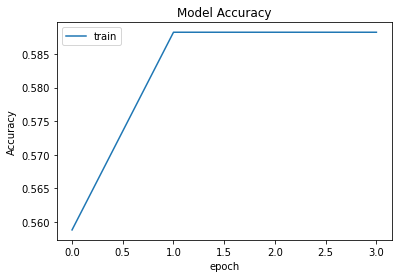

In [ ]:
import matplotlib.pyplot as plt

plt.plot(model.history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

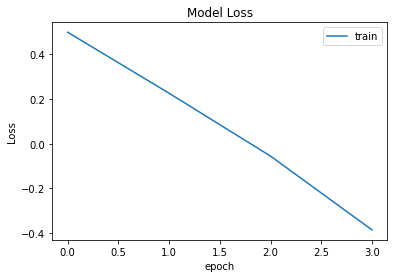

In [ ]:
plt.plot(model.history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper right')
plt.show()

In [ ]:
from keras.models import load_model

model.save('my_model.h5')
model = load_model('my_model.h5')

In [ ]:
audio = '/content/drive/MyDrive/NLP_Test/Test1.wav'
pred = predict(model, audio)
print(pred)

[[0.16351336]]


In [ ]:
if(pred[0][0]<0.18):
  print("Belongs to Loaded Class.\nThe sentence contains loaded words !")
  flag=1
else:
  print("Belongs to Non-Loaded Class.\nThe sentence is non-loaded !")
  flag=0

Belongs to Loaded Class.
The sentence contains loaded words !


In [ ]:
with sr.AudioFile(audio) as source:                  #converting audio to text
    audio_text = r.listen(source)
    try:
        text = r.recognize_google(audio_text) 
    except:
         print('Sorry.. run again...')


if(flag==0):
  print("The Sentence is:\n   "+text)                  #Non-loaded then just print the sentence
else:

  import nltk                                          #tokenization
  nltk.download('punkt')
  from nltk.tokenize import word_tokenize
  tokens = word_tokenize(text)
  print("\n\nThe Tokens are:")
  print(tokens)
  print("\n")

  from nltk.stem import PorterStemmer                  #stemmming
  from nltk.tokenize import sent_tokenize, word_tokenize
  ps = PorterStemmer()
  b=[]
  for w in tokens:
    b.append(ps.stem(w))

  #loaded word array
  ld=['anxious','concerned','exhausted','triumphant','categorical','tremendous','veritable','status','aggravate','bureaucrat','damage','atrocious','agony','eliminate','challenging']

  for w in tokens:
    if w in ld:
      print("The loaded word is ' \033[1m"+w+"\033[0m ' !\n\n")
      for c in tokens:
        if w in c:
          text=text.replace(c,"\033[1m"+c+"\033[0m")
          break

  print("The Sentence is:\n")
  print("   "+text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


The Tokens are:
['this', 'has', 'been', 'a', 'challenging', 'time', 'for', 'all', 'of', 'us']


The loaded word is ' challenging ' !


The Sentence is:

   this has been a challenging time for all of us
